In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.model_selection import train_test_split 
from sklearn import linear_model


In [2]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 500)

In [3]:
df=pd.read_csv("modelRankPrivate.csv",index_col = 0)
df.head()

,totalAveragePublicScore,Featured,Playground,Recruitment,Research,masters,totalStaff,totalMaster,totalExpert,totalContributor,totalGrandmaster,totalNovice,totalEntries,averagePublicScore,contributor,expert,grandmaster,master,novice,staff,rank,entries,rewardQuantity,totalTeams,totalMembers,Area Under Curve (AUC),Categorization Accuracy,Continuous Ranked Probability Score (CRPS),DarkWorldsMetric,Discounted cumulative gain (DCG),F-Score,Gesture Normalized Levenshtein Mean,Intersection over Union (IoU),Log Loss,Matthews correlation coefficient (MCC),Mean Absolute Error (MAE),Mean Average Precision (MAP),Normalized Gini Index,QuadraticWeightedKappa,Root Mean Square Percentage Error (RMSPE),Root Mean Squared Error (RMSE),Root Mean Squared Logarithmic Error (RMSLE),approximate median significance (AMS),rankPublic,PositionRanked
0,0.389967,1,0,0,0,0,0,88,239,127,21,619,1249,0.38779,0,0,0,1,0,0,469,0,100000,739,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,209,200
1,0.389967,1,0,0,0,0,0,89,237,127,21,619,1249,0.50263,0,2,0,0,0,0,134,2,100000,739,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,253,140
2,0.389967,1,0,0,0,0,0,89,239,127,21,616,1249,0.48623,0,0,0,0,3,0,194,4,100000,739,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,727,200
3,0.389967,1,0,0,0,0,0,89,239,127,21,616,1249,0.55320,0,0,0,0,3,0,44,7,100000,739,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,265,50
4,0.389967,1,0,0,0,0,0,89,239,127,21,618,1249,0.39779,0,0,0,0,1,0,450,6,100000,739,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,129,200


In [4]:
df.shape

(151217, 45)

In [5]:
df.PositionRanked.unique()

array([200, 140,  50,  60,  10,  30,  90,  40,  80, 120, 110, 150, 130,
        20,  70, 100], dtype=int64)

In [6]:
#eliminamos la primera columna, no es útil en el análisis
df.drop(['rank'], axis=1, inplace=True)

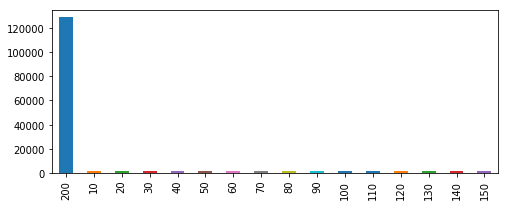

In [7]:
pd.value_counts(df['PositionRanked']).plot.bar( figsize = (8,3))

Vamos a tomar aquellas posiciones de ranking hasta 150. Son los que datos que muestran un balanceo más correcto para nuestro análisis.

In [8]:
df_rank= df[df.PositionRanked<200]
df_rank.head()


,totalAveragePublicScore,Featured,Playground,Recruitment,Research,masters,totalStaff,totalMaster,totalExpert,totalContributor,totalGrandmaster,totalNovice,totalEntries,averagePublicScore,contributor,expert,grandmaster,master,novice,staff,entries,rewardQuantity,totalTeams,totalMembers,Area Under Curve (AUC),Categorization Accuracy,Continuous Ranked Probability Score (CRPS),DarkWorldsMetric,Discounted cumulative gain (DCG),F-Score,Gesture Normalized Levenshtein Mean,Intersection over Union (IoU),Log Loss,Matthews correlation coefficient (MCC),Mean Absolute Error (MAE),Mean Average Precision (MAP),Normalized Gini Index,QuadraticWeightedKappa,Root Mean Square Percentage Error (RMSPE),Root Mean Squared Error (RMSE),Root Mean Squared Logarithmic Error (RMSLE),approximate median significance (AMS),rankPublic,PositionRanked
1,0.389967,1,0,0,0,0,0,89,237,127,21,619,1249,0.50263,0,2,0,0,0,0,2,100000,739,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,253,140
3,0.389967,1,0,0,0,0,0,89,239,127,21,616,1249,0.55320,0,0,0,0,3,0,7,100000,739,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,265,50
5,0.389967,1,0,0,0,0,0,89,239,127,21,618,1249,0.54294,0,0,0,0,1,0,4,100000,739,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,170,60
8,0.389967,1,0,0,0,0,0,89,239,127,20,619,1249,0.59407,0,0,1,0,0,0,1,100000,739,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,617,10
12,0.389967,1,0,0,0,0,0,89,238,127,21,619,1249,0.57448,0,1,0,0,0,0,2,100000,739,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,549,30


In [9]:
df_rank.shape

(22338, 44)

In [10]:
df_rank.describe()

,totalAveragePublicScore,Featured,Playground,Recruitment,Research,masters,totalStaff,totalMaster,totalExpert,totalContributor,totalGrandmaster,totalNovice,totalEntries,averagePublicScore,contributor,expert,grandmaster,master,novice,staff,entries,rewardQuantity,totalTeams,totalMembers,Area Under Curve (AUC),Categorization Accuracy,Continuous Ranked Probability Score (CRPS),DarkWorldsMetric,Discounted cumulative gain (DCG),F-Score,Gesture Normalized Levenshtein Mean,Intersection over Union (IoU),Log Loss,Matthews correlation coefficient (MCC),Mean Absolute Error (MAE),Mean Average Precision (MAP),Normalized Gini Index,QuadraticWeightedKappa,Root Mean Square Percentage Error (RMSPE),Root Mean Squared Error (RMSE),Root Mean Squared Logarithmic Error (RMSLE),approximate median significance (AMS),rankPublic,PositionRanked
count,2.233800e+04,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,2.233800e+04,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,2.233800e+04,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.00000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000
mean,1.044929e+21,0.731086,0.020145,0.008953,0.233683,0.006133,8.687618,1030.630674,1665.115140,2121.146208,428.021175,2044.732653,16044.388844,6.429020e+06,2.851912,4.543827,2.492927,4.787313,2.186230,0.044767,36.989346,4.675342e+04,1067.700600,16.906975,0.234354,0.040290,0.006715,0.006715,0.01343,0.047005,0.004477,0.026860,0.198272,0.013385,0.040603,0.134793,0.026681,0.033530,0.006715,0.066389,0.093070,0.006715,122.702883,76.748142
std,1.275183e+22,0.443405,0.140499,0.094200,0.423182,0.078075,16.112092,1236.854722,2443.333816,2797.552299,455.050425,4050.719345,21942.762750,5.475510e+08,10.148881,12.962064,13.048244,19.015895,9.856338,1.191312,54.756203,1.514187e+05,1223.441891,34.827433,0.423604,0.196643,0.081671,0.081671,0.11511,0.211655,0.066760,0.161678,0.398707,0.114920,0.197374,0.341510,0.161153,0.180021,0.081671,0.248967,0.290537,0.081671,205.718134,43.139012
min,4.322361e-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000
25%,3.993773e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,173.000000,252.000000,373.000000,80.000000,90.000000,2105.000000,3.236051e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,8.000000e+03,236.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,40.000000
50%,6.571987e-01,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,609.000000,669.000000,821.000000,277.000000,389.000000,5648.000000,5.744800e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,2.000000e+04,548.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,78.000000,80.000000
75%,9.037974e-01,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1426.000000,2100.000000,2861.000000,609.000000,2086.000000,23239.000000,8.271426e-01,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,46.000000,3.000000e+04,1499.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,110.000000
max,1.566

In [11]:
df_rank.shape

(22338, 44)

In [12]:
df_rank.PositionRanked.unique()

array([140,  50,  60,  10,  30,  90,  40,  80, 120, 110, 150, 130,  20,
        70, 100], dtype=int64)

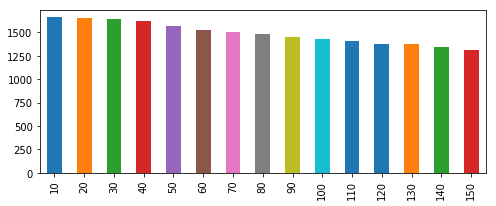

In [13]:
#Volvemos a mostrar los datos como anteriormente.
pd.value_counts(df_rank['PositionRanked']).plot.bar( figsize = (8,3))

Inicialmente trabajamos con todas la variables con nuestro modelo de predicción.

In [14]:
df_rank = df_rank.reset_index()

In [15]:
df_rank["averagePublicScore"] = df_rank.averagePublicScore.astype(float)

In [16]:
df_rank["totalAveragePublicScore"] = df_rank.totalAveragePublicScore.astype(float)

In [17]:
#Dejamos los datos de averagePublicScore con un número limitado de decimales, en este caso 5.
df_rank[['totalAveragePublicScore']] = df_rank[['totalAveragePublicScore']].applymap("{0:.5f}".format) 
df_rank[['averagePublicScore']] = df_rank[['averagePublicScore']].applymap("{0:.5f}".format)
df_rank.head(2)

,index,totalAveragePublicScore,Featured,Playground,Recruitment,Research,masters,totalStaff,totalMaster,totalExpert,totalContributor,totalGrandmaster,totalNovice,totalEntries,averagePublicScore,contributor,expert,grandmaster,master,novice,staff,entries,rewardQuantity,totalTeams,totalMembers,Area Under Curve (AUC),Categorization Accuracy,Continuous Ranked Probability Score (CRPS),DarkWorldsMetric,Discounted cumulative gain (DCG),F-Score,Gesture Normalized Levenshtein Mean,Intersection over Union (IoU),Log Loss,Matthews correlation coefficient (MCC),Mean Absolute Error (MAE),Mean Average Precision (MAP),Normalized Gini Index,QuadraticWeightedKappa,Root Mean Square Percentage Error (RMSPE),Root Mean Squared Error (RMSE),Root Mean Squared Logarithmic Error (RMSLE),approximate median significance (AMS),rankPublic,PositionRanked
0,1,0.38997,1,0,0,0,0,0,89,237,127,21,619,1249,0.50263,0,2,0,0,0,0,2,100000,739,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,253,140
1,3,0.38997,1,0,0,0,0,0,89,239,127,21,616,1249,0.55320,0,0,0,0,3,0,7,100000,739,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,265,50


In [18]:
# Create feature and target variable for Classification problem
X_rank = df_rank.drop(columns = ["PositionRanked",])# features: All columns except PostionRanked
y_rank = df_rank.PositionRanked  # Target variable: PositionRanked

In [19]:
X_rank = X_rank.reset_index()

Probamos inicialmente usando todas la variables.

### Construcción del modelo

Lo que vamos a hacer:

    Con el set de datos vamos a identificar los Features y los Labels de nuestro problema
    Con esa información vamos a entrenar un modelo.
    Teniendo información nueva vamos a usar nuestro modelo para realizar las predicciones


In [20]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error, r2_score

Usaremos un conjunto de entrenamiento y otro de validación que correspondan al 70% y 15% respectivamente, dejando el 15% restante para realizar test.

In [21]:

def train_validate_test_split(df_rank, set_entrenamiento_total_members_x=.7, set_validacion_total_members_x=.15, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df_rank.index)
    m = len(df_rank.index)
    train_end = int(set_entrenamiento_total_members_x * m)
    validate_end = int(set_validacion_total_members_x * m) + train_end
    train = df_rank.loc[perm[:train_end]]
    validate = df_rank.loc[perm[train_end:validate_end+1]]
    test = df_rank.loc[perm[validate_end+1:]]
    return train, validate, test

In [22]:
train, validate, test = train_validate_test_split(df_rank)

In [23]:
train.shape

(15636, 45)

In [24]:
validate.shape

(3351, 45)

In [25]:
test.shape

(3351, 45)

Lo que vamos a realizar ahora es dividir el set de entrenamiento(train y validate) en 2 data frames. Uno de ellos tendrá solo las variables del problema y el otro solamente los resultados.

In [26]:
X_rank.columns

Index(['level_0', 'index', 'totalAveragePublicScore', 'Featured', 'Playground',
       'Recruitment', 'Research', 'masters', 'totalStaff', 'totalMaster',
       'totalExpert', 'totalContributor', 'totalGrandmaster', 'totalNovice',
       'totalEntries', 'averagePublicScore', 'contributor', 'expert',
       'grandmaster', 'master', 'novice', 'staff', 'entries', 'rewardQuantity',
       'totalTeams', 'totalMembers', 'Area Under Curve (AUC)',
       'Categorization Accuracy', 'Continuous Ranked Probability Score (CRPS)',
       'DarkWorldsMetric', 'Discounted cumulative gain (DCG)', 'F-Score',
       'Gesture Normalized Levenshtein Mean', 'Intersection over Union (IoU) ',
       'Log Loss', 'Matthews correlation coefficient (MCC)',
       'Mean Absolute Error (MAE)', 'Mean Average Precision (MAP)',
       'Normalized Gini Index', 'QuadraticWeightedKappa',
       'Root Mean Square Percentage Error (RMSPE)',
       'Root Mean Squared Error (RMSE)',
       'Root Mean Squared Logarithmic Erro

In [27]:
#Construccion data frame de entrenamiento
set_entrenamiento_total_members_x= train[['totalAveragePublicScore','Featured','Playground','Recruitment',
                                          'Research','masters','totalStaff','totalMaster','totalExpert',
                                          'totalContributor','totalGrandmaster','totalNovice','totalEntries',
                                          'averagePublicScore','contributor','expert','grandmaster','master',
                                          'novice','staff','entries','rewardQuantity','totalTeams','totalMembers',
                                          'rankPublic']]
set_entrenamiento_total_members_y=train.PositionRanked

#Construccion data frame de validacion
#Este data frame lo usaremos para predecir 
set_validacion_total_members_x= validate[['totalAveragePublicScore','Featured','Playground','Recruitment',
                                          'Research','masters','totalStaff','totalMaster','totalExpert',
                                          'totalContributor','totalGrandmaster','totalNovice','totalEntries',
                                          'averagePublicScore','contributor','expert','grandmaster','master',
                                          'novice','staff','entries','rewardQuantity','totalTeams','totalMembers',
                                          'rankPublic']]
#Este date frame lo usaremos para validar los resultados para el calculo de precision
set_validacion_total_members_y =validate.PositionRanked 

print("Set de entrenamiento con features")
display(set_entrenamiento_total_members_x.head())
print("Set de entrenamiento con labels")
display(set_entrenamiento_total_members_y.head())

Set de entrenamiento con features


,totalAveragePublicScore,Featured,Playground,Recruitment,Research,masters,totalStaff,totalMaster,totalExpert,totalContributor,totalGrandmaster,totalNovice,totalEntries,averagePublicScore,contributor,expert,grandmaster,master,novice,staff,entries,rewardQuantity,totalTeams,totalMembers,rankPublic
5898,0.50014,1,0,0,0,0,2,202,329,476,75,69,3019,0.62625,0,0,0,3,0,0,11,5000,223,3,28
18297,0.69119,1,0,0,0,0,1,41,96,306,37,23,1402,0.74299,1,0,0,0,0,0,6,950,176,1,99
19211,0.37815,1,0,0,0,0,0,57,212,297,24,92,679,0.34750,0,0,0,0,1,0,1,80000,170,1,106
11297,0.05882,1,0,0,0,0,9,103,50,163,66,17,729,0.18485,1,0,0,0,0,0,2,3000,70,1,68
15066,0.73032,1,0,0,0,0,6,130,199,402,55,37,2800,0.79111,4,0,0,0,0,0,5,5000,204,4,95


Set de entrenamiento con labels


5898     20 
18297    90 
19211    110
11297    70 
15066    90 
Name: PositionRanked, dtype: int64

Construimos el modelo

In [28]:
modelo = KNeighborsClassifier(n_neighbors=15)
modelo = modelo.fit(set_entrenamiento_total_members_x,set_entrenamiento_total_members_y)

La función llamada predict la cual recibe como parámetro los features que queremos predecir y como salida tendremos un array con los labels a los cuales el algoritmo predijo. 

In [29]:
prediction=modelo.predict(set_validacion_total_members_x)
df_resultado_final = set_validacion_total_members_x.copy()
df_resultado_final['Posicion_final'] = prediction
df_resultado_final.head()

,totalAveragePublicScore,Featured,Playground,Recruitment,Research,masters,totalStaff,totalMaster,totalExpert,totalContributor,totalGrandmaster,totalNovice,totalEntries,averagePublicScore,contributor,expert,grandmaster,master,novice,staff,entries,rewardQuantity,totalTeams,totalMembers,rankPublic,Posicion_final
9145,0.15307,1,0,0,0,0,2,463,400,431,315,142,2355,0.00013,0,0,0,3,0,0,3,10000,340,3,142,130
10388,0.94717,1,0,0,0,0,0,768,438,841,130,89,2304,0.95356,6,0,0,0,0,0,13,7500,237,6,37,40
3992,0.55875,0,0,0,1,0,0,99,118,183,29,46,779,0.56388,1,0,0,0,0,0,1,600,96,1,70,80
14123,0.84953,0,0,0,1,0,0,81,53,124,28,15,642,0.85554,1,0,0,0,0,0,2,500,89,1,46,30
6558,0.79596,1,0,0,0,0,2,270,329,2178,214,202,7722,0.83297,4,0,0,0,0,0,5,5000,924,4,82,80


Ahora podemos calcular la eficacia de nuestro modelo. Para ello Scikit-Learn tiene un paquete de metrics el cual nos devuelve el porcentaje de eficiencia en base a los resultados predecidos y los que conocemos


In [30]:
from sklearn import metrics
print('La eficacia del algoritmo fue',
metrics.accuracy_score(prediction,set_validacion_total_members_y))


La eficacia del algoritmo fue 0.23604894061474188


In [31]:
#Construccion data frame de entrenamiento
set_entrenamiento_total_members_x= train[['totalAveragePublicScore','Featured','Playground','Recruitment',
                                          'Research','masters','totalStaff','totalMaster','totalExpert',
                                          'totalContributor','totalGrandmaster','totalNovice','totalEntries',
                                          'averagePublicScore','contributor','expert','grandmaster','master',
                                          'novice','staff','entries','rewardQuantity','totalTeams','totalMembers',
                                          'rankPublic']]
set_entrenamiento_total_members_y=train.PositionRanked

#Este data frame lo usaremos para predecir 
set_test_total_members_x= test[['totalAveragePublicScore','Featured','Playground','Recruitment',
                                          'Research','masters','totalStaff','totalMaster','totalExpert',
                                          'totalContributor','totalGrandmaster','totalNovice','totalEntries',
                                          'averagePublicScore','contributor','expert','grandmaster','master',
                                          'novice','staff','entries','rewardQuantity','totalTeams','totalMembers',
                                          'rankPublic']]
#Este date frame lo usaremos para validar los resultados para el calculo de precision
set_test_total_members_y =test.PositionRanked 


In [32]:
print('La eficacia del algoritmo fue',
metrics.accuracy_score(prediction,set_test_total_members_y))

La eficacia del algoritmo fue 0.06982990152193375


## Prueba con otro modelo

Usamos nuevamente la función train_test_split para hacer la división. Test_size = 0.2 dentro de la función indica el porcentaje de los datos que deben retenerse para la prueba

In [33]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_rank, y_rank, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(17870, 45) (17870,)
(4468, 45) (4468,)


Ahora preparamos el modelo:      


In [34]:
# fit a model
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Estamos ajustando el modelo en los datos de entrenamiento e intentamos predecir los datos de la prueba. Veamos cuáles son algunas las predicciones:

In [35]:
predictions[0:5]

array([76.84283305, 76.84283305, 76.84283302, 76.84283305, 76.84283306])

Text(0,0.5,'Predictions')

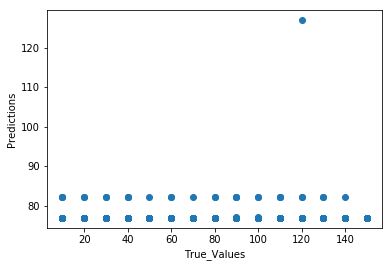

In [36]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True_Values")
plt.ylabel("Predictions")

In [37]:
print ("Score: ", model.score(X_test, y_test))

Score:  -0.0002788197004885973


### ABANDONAMOS LA PRUEBA, NO SE OBTIENEN RESULTADOS

## VALIDACIÓN CRUZADA

Podemos realizar algo llamado validación cruzada. Es muy similar a la división de train / test, pero se aplica a más subconjuntos. Es decir, dividimos nuestros datos en k subconjuntos, y entrenamos en k-1 uno de esos subconjuntos. Lo que hacemos es mantener el último subconjunto para la prueba. Podemos hacerlo para cada uno de los subconjuntos.


In [38]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [39]:
# Perform 6-fold cross validation
scores = cross_val_score(model, X_rank, y_rank, cv=6)
print ("Cross-validated scores:", scores)

Cross-validated scores: [ 5.04397524e-09 -2.81030215e+19 -3.37515284e-04 -1.85433434e-05
 -1.34873980e-04 -2.10904716e+00]


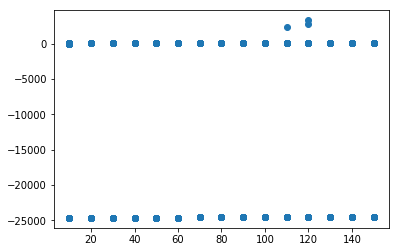

In [40]:
# Make cross validated predictions
predictions = cross_val_predict(model, df_rank, y_rank, cv=6)
plt.scatter(y_rank, predictions)

Finalmente, verifiquemos el puntaje R² del modelo (R² es un "número que indica la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes". Básicamente, qué tan preciso es nuestro modelo):

In [41]:
accuracy = metrics.r2_score(y_rank, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: -2179.1072114983845


### Como veníamos viendo el modelo no tiene ninguna utilidad

## NUEVA PRUEBA CON CROSS VALIDATION

In [42]:
# Create feature and target variable for Classification problem
data_input = df_rank.drop(columns = ["PositionRanked",])# features: All columns except PostionRanked
data_output = df_rank.PositionRanked  # Target variable: PositionRanked

Le pedimos a Scikit que cree un kfold para nosotros. Hay 5 splits, y 'shuffle' significa aleatorizar los datos.

In [43]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
kf = KFold(n_splits = 5, shuffle=True)

Antes de continuar, compararemos 3 algoritmos de aprendizaje. Random Forest, Regresión logística y SVM.

Creamos instancias para bosques aleatorios, regresión logística y svm:

In [44]:
rf_class = RandomForestClassifier(n_estimators=10)
log_class = LogisticRegression()
svm_class = svm.SVC()

In [45]:
print(cross_val_score(rf_class, data_input, data_output, scoring='accuracy', cv = 10))

[0.22579206 0.22554712 0.28507596 0.26776933 0.27829978 0.210927
 0.28821156 0.2264574  0.23608618 0.32479784]


Si queremos encontrar la precisión promedio

In [46]:
accuracy = cross_val_score(rf_class, data_input, data_output, scoring='accuracy', cv = 10).mean() * 100
print("Accuracy of Random Forests is: " , accuracy)

Accuracy of Random Forests is:  24.771373184716534


Con Random Forest, seguimos teniendo una baja precisión, apenas un 25%.

Hagamos lo mismo para el resto de algoritmos.

In [ ]:
print("\n\nSVM:")
print(cross_val_score(svm_class, data_input, data_output, scoring='accuracy', cv = 10))
accuracy = cross_val_score(svm_class, data_input, data_output, scoring='accuracy', cv = 10).mean() * 100
print("Accuracy of SVM is: " , accuracy)
 
print("\n\nLog:")
print(cross_val_score(log_class, data_input, data_output, scoring='accuracy', cv = 10))
accuracy = cross_val_score(log_class, data_input, data_output, scoring='accuracy', cv = 10).mean() * 100
print("Accuracy of SVM is: " , accuracy)



SVM:
[0.0745203  0.07369361 0.07640751 0.07688869 0.07695749 0.07613077
 0.0744061  0.07399103 0.07540395 0.07592093]


Los resultados obtenidos son aún peores.

Creamos nuestra división de test / train, estaba vez dejando un tercio del dataset a modo de test:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.33)

In [ ]:
#Usando Ramdon Forest
rf_class.fit(X_train, y_train)
rf_class.score(X_test, y_test)

In [ ]:
#Con Logistic Regression
log_class.fit(X_train, y_train)
log_class.score(X_test, y_test)

In [ ]:
#Finalmente con SVM
svm_class.fit(X_train, y_train)
svm_class.score(X_test, y_test)

Encontramos cierta mejoría en los valores de Ramdon Forest y SVM, pero aún así insuficientes.


## Otra aproximación:

 Sería con la misma configuración pero esta vez usaremos previamente SelectKBest para quedarnos con las variables que nos darían un mejor resultado. En este caso seleccionamos 8 usando la función f_regression.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
data_input_2=SelectKBest(score_func=f_regression,k=5).fit_transform(X_rank,y_rank)

In [ ]:
print(data_input_2[:5])

In [ ]:
print(data_input.head())

Cremos modelo de test y entrenamiento similar al anterior, pero usando data_input_2:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_input_2, data_output, test_size=0.33)

In [ ]:
#Usando Ramdon Forest
rf_class.fit(X_train, y_train)
rf_class.score(X_test, y_test)

In [ ]:
#Con Logistic Regression
log_class.fit(X_train, y_train)
log_class.score(X_test, y_test)

In [ ]:
#Finalmente con SVM
svm_class.fit(X_train, y_train)
svm_class.score(X_test, y_test)

Obtenemos cierta mejoría con Logistic Regression y más significativa con SVM, pero aún así se muestran insufientes.

### Realizamos una nueva prueba pero con más variables esta vez. Ya hemos visto que con todas los resultados no son buenos, veamos con 20, lo que representa casi el 50% del dataset

In [ ]:
data_input_3=SelectKBest(score_func=f_regression,k=20).fit_transform(X_rank,y_rank)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_input_3, data_output, test_size=0.33)

In [ ]:
#Usando Ramdon Forest
rf_class.fit(X_train, y_train)
rf_class.score(X_test, y_test)

In [ ]:
#Con Logistic Regression
log_class.fit(X_train, y_train)
log_class.score(X_test, y_test)

In [ ]:
#Finalmente con SVM
svm_class.fit(X_train, y_train)
svm_class.score(X_test, y_test)

#### NO HAY MEJORA, ABANDONAMOS LA PRUEBA.